### Newton (-Raphson) method for nonlinear systems of equations 

Let us consider the problem with $N$ functions of $N$ variables $x_i$, $i=1,2,...,N$:

\begin{equation}
F_i(x_1,x_2,...,x_N) = 0\,\,\,\,\,\,\,\,\textrm{ with } i=1,2,...,N.\tag{1}
\end{equation}

Let ${\bf x}$ denote the entire vector of values $x_i$ and ${\bf F}$ denote the entire vector of functions $F_i$. The idea is to replicate the Newton method in $N$ dimensions by approximating $F_i$ evaluated in ${\bf x}$ as a linear function:

\begin{equation}
F_i(\bf{x}+\delta\bf{x}) \approx F_i(\bf{x}) + \sum_{j=1}^N\frac{\partial F_i}{\partial x_j} \delta x_j,\tag{2}
\end{equation}

and find $\delta\bf{x}$ that makes $\it{all}$ $F_i$'s equal to zero. That way, the new estimate for the root ${\bf x}_{new}$ will be the old estimate ${\bf x}_{old}$ plus $\delta\bf{x}$. In other words:

\begin{equation}
\bf{x}_{new} = \bf{x}_{old} + \delta\bf{x}.\tag{3}
\end{equation}

In order to find $\delta\bf{x}$ we need to solve:
\begin{equation}
F_i(\bf{x}) + \sum_{j=1}^N\frac{\partial F_i}{\partial x_j} \delta x_j = 0,\tag{4}
\end{equation}
which can be expressed in matrix notation
\begin{equation}
\bf{J}\cdot \delta \bf{x}=-F,\tag{5}
\end{equation}
where $\bf{J}$ is the Jacobian matrix:

\begin{equation}
J_{ij} = \frac{\partial F_i}{\partial x_j}. \tag{6}
\end{equation}

Equation \ref{jij} can be solved using what we know about solving systems of linear equations.

##### Backtracking

If we are not close enough to a root, using the full step $\bf{x}$ may take us farther rather than closer to the root. This can make the algorith inefficient or even precude us from finding the roots. One way to solve this problem is through "backtracking", which simply means to take a fraction $\beta$ of the full step in order to ensure that in each step we are getting closer to the roots. 

If we define 
\begin{equation}
f=\frac{1}{2}\bf{F}\cdot\bf{F},\tag{7}
\end{equation}

we can show that $\delta\bf{x}$ is a descent direction of $f$. This is done as follows:

The $i$ component of the gradient of $f$, $\nabla f$, is:

\begin{equation}
(\nabla f)_i = \frac{\partial f}{\partial x_i} =\frac{1}{2}\frac{\partial \sum_{j=1}^N F_jF_j}{\partial x_i} = \sum_{j=1}^N \frac{\partial F_j}{\partial x_i}F_j = (\bf{J}\cdot\bf{F})_i.\tag{8}
\end{equation}

This means that 

\begin{equation}
\nabla f \cdot \delta \bf{x} = (\bf{F}\cdot\bf{J})\cdot(-\bf{J}^{-1}\cdot\bf{F}) = -\bf{F}\cdot\bf{F} < 0,\tag{9}
\end{equation}

which means that, for a small enough step, it is ensure that $f$ must decrease.

One possible criterion is to enforce in each step that:

\begin{equation}
f(\bf{x}_{new}) - f(\bf{x}_{old}) \le \alpha \nabla f(\bf{x}_{old}) \cdot (\bf{x}_{new}-\bf{x}_{old}),
\end{equation}
where a recommended value for $\alpha$ is $\alpha=10^{-4}$. 

# Implementación Tarea

In [95]:
import numpy as np
import matplotlib.pyplot as plt

Define $F_0$ and $F_1$:
\begin{equation}
 F_0=x^4+y^4-10
 \end{equation}
and
\begin{equation}
 F_1=x^3y-xy^3+0.5y-2.
\end{equation}
Thus
\begin{equation}
\frac{\partial F_0}{\partial x}=4x^3\textrm{; } \,\,  \frac{\partial F_0}{\partial y}=4y^3
\end{equation}
and
\begin{equation}
\frac{\partial F_1}{\partial x}=3x^2y-y^3\textrm{; } \,\,  \frac{\partial F_1}{\partial y}=x^3-x3y^2-0.5
\end{equation} 

In [96]:
def f0(x,y):
    return x**4 + y**4 - 10

def f1(x,y):
    return x**3*y - x*y**3 - 0.5*y - 2

def df0x(x):
    return 4*(x**3)

def df0y(y):
    return 4*(y**3)

def df1x(x,y):
    return 3*(x**2)*y - y**3

def df1y(x,y):
    return x**3 - x*3*(y**2) - 0.5

In [102]:
def newtonraphson(par, M, method):
    N =2
    J = np.empty((N,N))
    F = np.empty(N)
    deltax = np.empty(N)
    x = np.empty(M+1)
    y = np.empty(M+1)
    x[0]= par[0] #3.1
    y[0]= par[1]
    for step in range(M):
        F[0] = -f0(x[step],y[step])
        F[1] = -f1(x[step],y[step])
        J[0,0] = df0x(x[step])
        J[0,1] = df0y(y[step])
        J[1,0] = df1x(x[step],y[step])
        J[1,1] = df1y(x[step],y[step])

        J_1 = np.linalg.inv(J)
        deltax = np.dot(J_1, F)

        beta=1.
        alpha=1e-8
        x[step+1] = x[step] + deltax[0]
        y[step+1] = y[step] + deltax[1]
    ##############
    # backtracking
    ##############
        if method == 'back':
            f_old = 0.5*(f0(x[step], y[step])**2 + f1(x[step], y[step])**2)
            f_new = 0.5*(f0(x[step+1], y[step+1])**2 + f1(x[step+1], y[step+1])**2)
            crit = alpha*beta*(-2)*f_old
            while f_new - f_old > crit: 
                beta = 0.5*beta
                x[step+1] = x[step] + beta*deltax[0]
                y[step+1] = y[step] + beta*deltax[1]
                f_new = 0.5*(f0(x[step+1], y[step+1])**2 + f1(x[step+1], y[step+1])**2)
                crit = alpha*(-2)*f_old*beta  

    return x, y
############

## Implementación con Backtracking

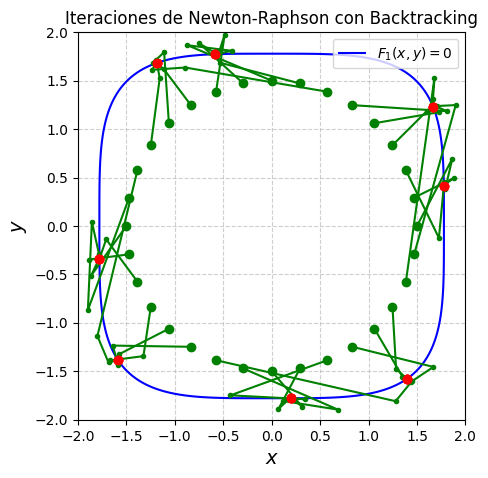

In [103]:
# Límites del plot
a = -2
b = 2 
N = 1000

x_val = np.linspace(a, b, N)
y_val = np.linspace(a, b, N)

# Grid para hacer el contour de  f0(x, y) = 0
x_grid, y_grid = np.meshgrid(x_val, y_val)

# Conseguir los 32 puntos equiespaciados en el círculo de radio R = 1.5
n = 32
r = 1.5
pts_cir = []
ticks = np.linspace(0, 2 * np.pi, n, endpoint = False)
for t in ticks:
    x_cir = r * np.cos(t)
    y_cir = r * np.sin(t)
    point = (x_cir, y_cir)
    pts_cir.append(point)


# Make it nicer
plt.figure(figsize=(5,6))
plt.title('Iteraciones de Newton-Raphson con Backtracking')
contours = plt.contour(x_grid, y_grid, f0(x_grid, y_grid), levels=[0], colors='blue')

M = 5
for p in pts_cir:
    x, y = newtonraphson(p, M, 'back')
    plt.plot(x, y, color = 'green', marker = 'o', markersize=3, label = 'Path of Iterations')
    plt.plot(x[0], y[0], color = 'green', marker = 'o', label = 'First Guess')
    plt.plot(x[M], y[M], color = 'red', marker = 'o', label = 'Last Iteration')


plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)
plt.grid(True, alpha = 0.6, ls = '--')
h,_ = contours.legend_elements()
plt.legend([h[0]], [r'$F_1(x,y) = 0$'])
plt.gca().set_aspect('equal')

plt.show()






* Como se puede apreciar en la figura anterior, utilizando backtracking en la  
busqueda de los ceros si se logra llegar a alguna raíz en todos los puntos  
de partida escogidos, y se consiguen los 8 ceros esperados según el enunciado

## Implementación sin Bactracking

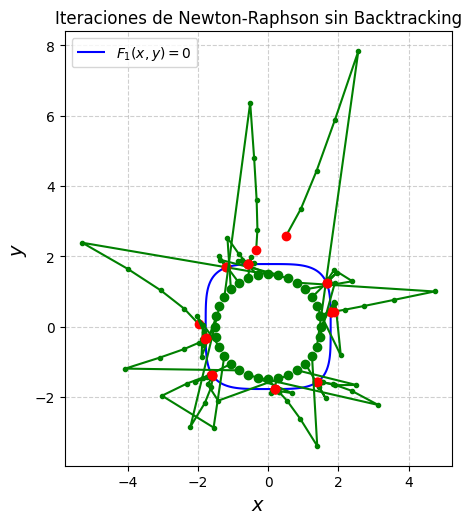

In [106]:
plt.figure(figsize=(5,6))
plt.title('Iteraciones de Newton-Raphson sin Backtracking')
contours = plt.contour(x_grid, y_grid, f0(x_grid, y_grid), levels=[0], colors='blue')

M = 5
for p in pts_cir:
    x, y = newtonraphson(p, M, 'no_back')
    plt.plot(x, y, color = 'green', marker = 'o', markersize=3, label = 'Path of Iterations')
    plt.plot(x[0], y[0], color = 'green', marker = 'o', label = 'First Guess')
    plt.plot(x[M], y[M], color = 'red', marker = 'o', label = 'Last Iteration')


plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)
plt.grid(True, alpha = 0.6, ls = '--')
h,_ = contours.legend_elements()
plt.legend([h[0]], [r'$F_1(x,y) = 0$'])
plt.gca().set_aspect('equal')

plt.show()



* A diferencia de la implementación del backtracking, si este se omite en la  
busqueda de los ceros del sistema no es seguro que el método llegue en  
todas ocasiones a uno de los 8 que aparecen en la implementación anterior.  
Esto se puede notar pues en varias ocasiones, al no utilizar backtracing para  
corregir pasos muy grandes, el método se escapa y no alcanza a llegar a una  
solución en sólo 5 iteraciones